In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# img_file = "./assets/mobile_aloha/assets/cardboard_raw.jpeg"
# img_file = "./assets/mobile_aloha/assets/tabletop_raw.jpeg"
# img_file = "./assets/mobile_aloha/assets/cardboard_1x.jpg"
img_file = "./assets/franka_dual/assets/franka_dual_base.jpeg"

In [6]:
img = cv2.imread(img_file)
img.shape

(1448, 2573, 3)

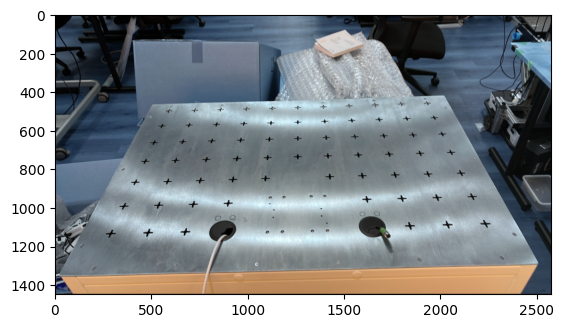

In [7]:
plt.imshow(img)

In [8]:
# card board
# pts1 = np.array([(2555, 3221), (597, 3238), (607, 341), (2479, 307)], dtype=np.float32)
# pts2 = np.array([(0, 0), (0, 357), (544, 357), (544, 0)], dtype=np.float32)

# tabletop
# pts1 = np.array([(50, 653), (3943, 598), (3970, 2497), (84, 2564)], dtype=np.float32)
# pts2 = np.array([(0, 600), (1218, 600), (1218, 0), (0, 0)], dtype=np.float32)

# cardboard 1x
# pts1 = np.array([(152, 414), (73, 432), (112, 328), (168, 313)], dtype=np.float32)
# pts2 = np.array([(0, 0), (0, 130), (370, 130), (370, 0)], dtype=np.float32)

# fraka dual base
pts1 = np.array([(25, 1346), (505, 468), (2014, 421), (2501, 1287)], dtype=np.float32)
pts2 = np.array([(0, 0), (0, 780), (1160, 780), (1160, 0)], dtype=np.float32)


[  25. 1346.]
[505. 468.]
[2014.  421.]
[2501. 1287.]


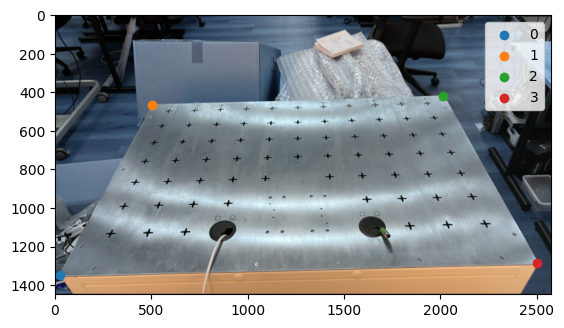

In [9]:
plt.imshow(img)

for i, pt in enumerate(pts1):
    print (pt)    
    plt.scatter([pt[0]], [pt[1]], label=i)
plt.legend()

In [10]:
# 射影行列の取得
M = cv2.getPerspectiveTransform(pts1, pts2) 
np.set_printoptions(precision=5, suppress=True)
print (M)

[[   1.24136    0.67865 -944.49671]
 [  -0.03362   -1.41081 1899.78511]
 [   0.00005    0.00116    1.     ]]


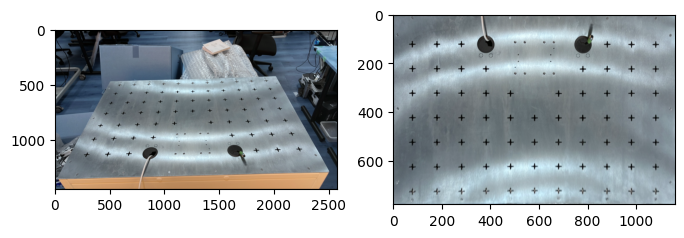

In [11]:

w2, h2 = pts2.max(axis=0).astype(int) 
img2 = cv2.warpPerspective(img.copy(), M, (w2,h2) )

# 結果表示 
fig = plt.figure(figsize=(8,8))
fig.add_subplot(1,2,1).imshow(img)
fig.add_subplot(1,2,2).imshow(img2)
plt.show()

In [11]:
# img_resize = cv2.resize(img, (1024, 1024))
# img_resize.shape

In [12]:
cv2.imwrite("./assets/mobile_aloha/assets/franka_dual_base_homography.png", img2[::-1])

True